In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':300,})
plt.style.use('seaborn-whitegrid')
from run_icml import split_max_episodes


/tmp/ipykernel_1326/2289123882.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
2024-05-10 11:50:04.166876: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 11:50:05.393424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_data(env: str, algo: str, seed: int, max_episodes: int) -> pd.DataFrame:

    policy_episodes, experiment_episodes = split_max_episodes(max_episodes)

    path = f"results/icml/{env}/icml_{policy_episodes}_{algo}_{experiment_episodes}_{seed}.csv"

    data = pd.read_csv(path)
    # add column for accumulated reward
    data['accumulated reward'] = data['rewards'].cumsum()

    # add column for success rate
    data['success rate'] = data['success'].cumsum() / (data.index + 1)

    return data

In [8]:
# seeds
seeds = [237, 379, 482, 672, 886]
CartPoleEpisodes = 1000
AcrobotEpisodes = 2000
MountainCarEpisodes = 3000
MountainCarContinuousEpisodes = 1000
LunarLanderEpisodes = 3000
PendulumEpisodes = 3000
# envs
max_episodes = {
    "Acrobot-v1": AcrobotEpisodes,
    "CartPole-v1": CartPoleEpisodes,
    "MountainCar-v0": MountainCarEpisodes,
    "MountainCarContinuous-v0": MountainCarContinuousEpisodes,
    "Pendulum-v1": PendulumEpisodes,
    "LunarLander-v2": LunarLanderEpisodes
}
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "LunarLander-v2", "Pendulum-v1"]
# methods
algos = ["ppo"]
methods = ["binQ", "tileCoding.py"]
# load the data
data = {}
for algo in algos:
    data[algo] = {}
    for env in envs:
        data[algo][env] = {}
        for seed in seeds:
            data[algo][env][seed] = load_data(env, algo, seed, max_episodes[env])


In [9]:
def create_plot_data(method, env, seeds, ax):
    plot_data = pd.DataFrame()

    for seed in seeds:
        plot_data = pd.concat([plot_data, data[method][env][seed][[ax]]], axis=1)
        # mean of accumulated reward
    mean = plot_data.mean(axis=1)
    std = plot_data.std(axis=1)
    
    plot_data["mean"] = mean
    plot_data["std"] = std
    plot_data["episode"] = plot_data.index
    return plot_data

def plot(methods, env, seeds, ax, p=plt):
    
    for method in methods:
        plot_data = create_plot_data(method, env, seeds, ax)
        p.plot(plot_data["episode"], plot_data["mean"], label=method)
        p.fill_between(plot_data["episode"], plot_data["mean"] - plot_data["std"], plot_data["mean"] + plot_data["std"], alpha=0.2)
        # add legend
        p.legend()

    # p.ticklabel_format(axis='both', style='scientific', scilimits=(-10,10))


        
    # if plt is the default plt
    if p == plt:
        p.xlabel("Episode")
        p.ylabel(ax[0].upper() + ax[1:])
        p.title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.ylim(0, 1)
    else:
        p.set_xlabel("Episode")
        p.set_ylabel(ax[0].upper() + ax[1:])
        p.set_title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.set_ylim(0, 1)


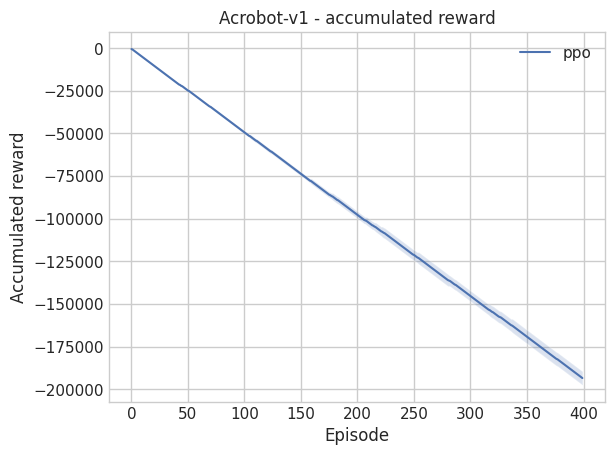

In [13]:
plot(algos, "Acrobot-v1", seeds, "accumulated reward")

In [14]:
plot(algo, "Acrobot-v1", seeds, "success rate")

KeyError: 'p'

In [ ]:
def create_plot_grid(methods, envs, seeds, ax):
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    # add margin bewteen subplots
    fig.subplots_adjust(hspace = 0.4)

    # add title to the whole plot
    # fig.suptitle("Comparing abstraction methods on " + ax)

    for i, env in enumerate(envs):
        plot(methods, env, seeds, ax, axs[i // 3][i % 3])
        
    #save the plot as svg
    plt.savefig(f"images/{ax}.pdf", bbox_inches='tight', format='pdf')
    plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'images/accumulated reward.pdf'

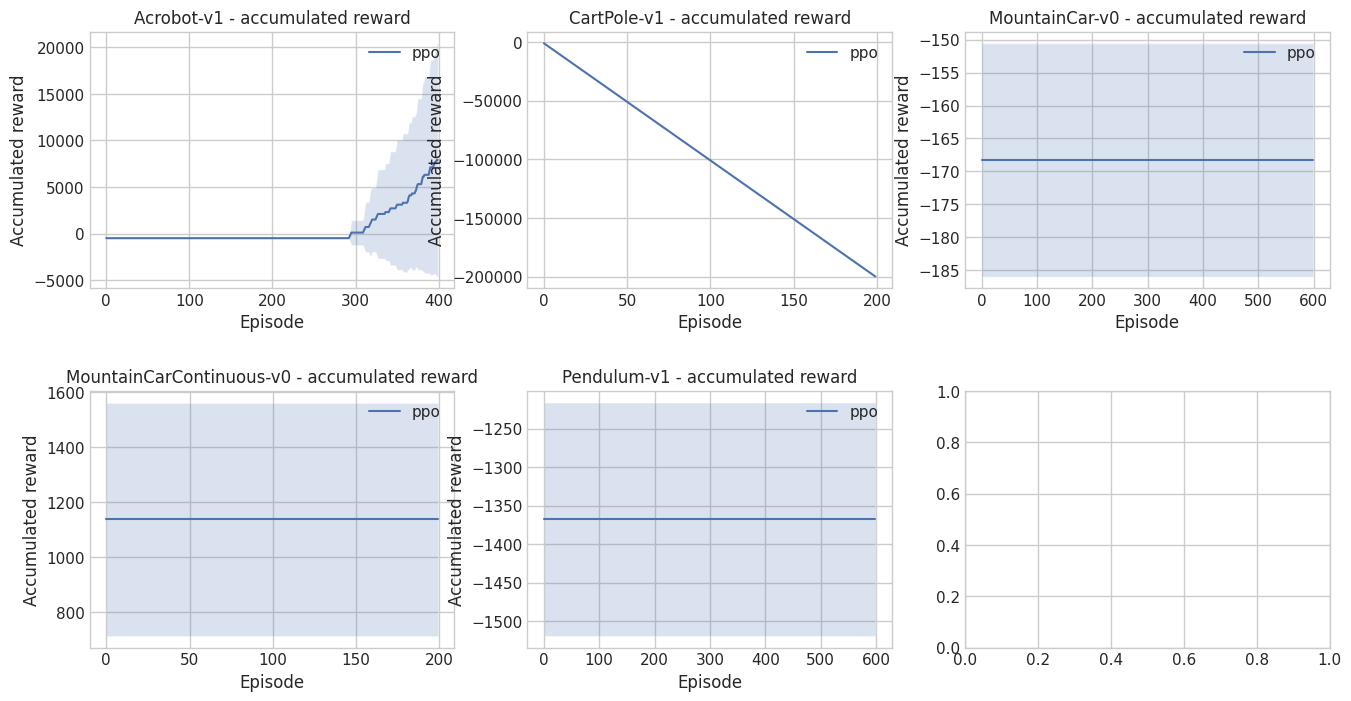

In [ ]:
create_plot_grid(algos, envs, seeds, "accumulated reward")


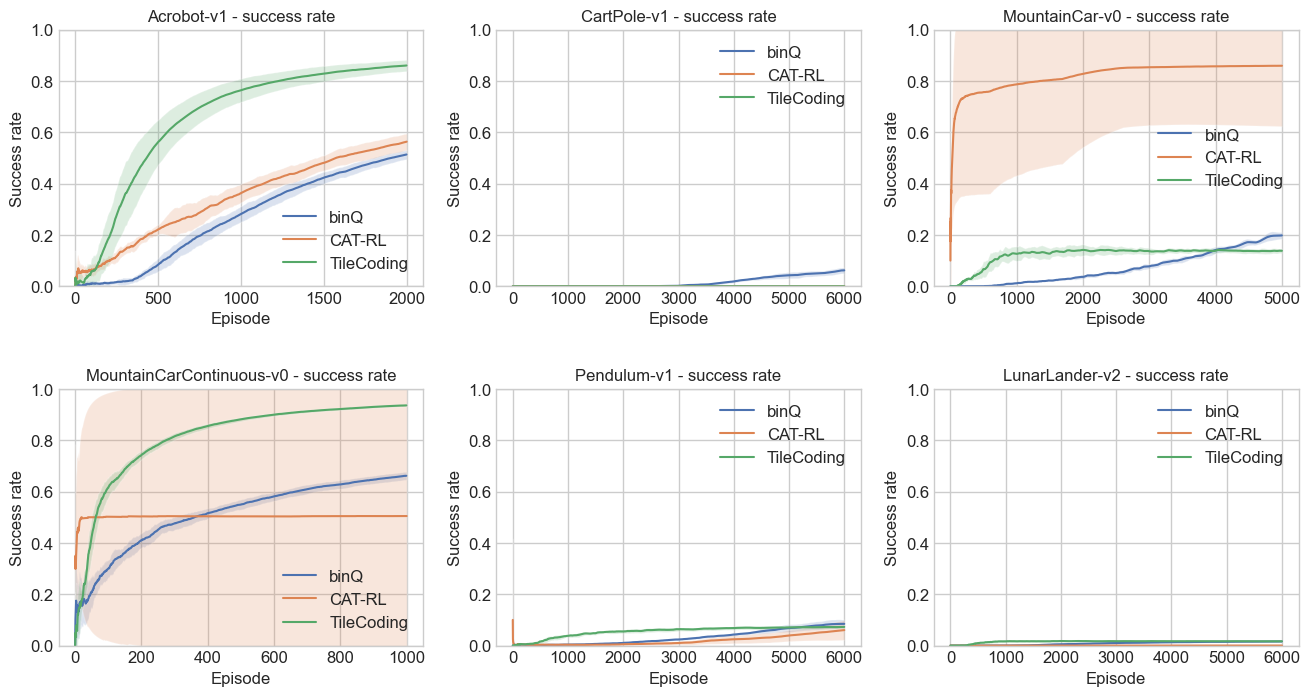

In [ ]:
create_plot_grid(methods, envs, seeds, "success rate")